### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Exploring Relationships

     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [4]:
# Importing the cleaned dataset
bike_cleaned = pd.read_csv(r'/Users/peterguan/Citi Bike Analysis/02 Data/Prepared Data/bike.csv', index_col = False)

In [5]:
# Checking if the dataset imported successfully
bike_cleaned.head()

Unnamed: 0 trip_id  bike_id weekday  start_hour           start_time  \
0           0  LnQzQk    16013     Mon          18  2013-09-09 18:18:55   
1           1  IL9boN    15230     Thu          18  2013-09-12 18:38:53   
2           2  46clGB    17942     Wed          19  2013-09-18 19:44:04   
3           3  v7vdFt    19683     Sat          11  2013-09-28 11:54:37   
4           4  VGBsb5    18024     Sat          18  2013-09-07 18:08:22   

   start_station_id       start_station_name  start_station_latitude  \
0               523          W 38 St & 8 Ave               40.754666   
1               257  Lispenard St & Broadway               40.719392   
2               479          9 Ave & W 45 St               40.760193   
3               527          E 33 St & 1 Ave               40.743156   
4               521          8 Ave & W 31 St               40.750450   

   start_station_longitude             end_time  end_station_id  \
0               -73.991382  2013-09-09 18:35:28             334   
1               -74.002472  2013-09-12 18:48:34             236   
2               -73.991255  2013-09-18 19:50:05             513   
3               -73.974347  2013-09-28 12:03:58             441   
4               -73.994811  2013-09-07 18:46:38             476   

      end_station_name  end_station_latitude  end_station_longitude  \
0      W 20 St & 7 Ave             40.742388             -73.997262   
1  St Marks Pl & 2 Ave             40.728419             -73.987140   
2     W 56 St & 10 Ave             40.768254             -73.988639   
3      E 52 St & 2 Ave             40.756014             -73.967416   
4      E 31 St & 3 Ave             40.743943             -73.979661   

   trip_duration      subscriber  birth_year   gender  age  
0            993      Subscriber        1968   Female   45  
1            581      Subscriber        1983     Male   30  
2            361      Subscriber        1989     Male   24  
3            561      Subscriber        1988   Female   25  
4           2296  Non-Subscriber        1978  Unknown   35

In [6]:
# Checking the dimensions of the dataset
bike_cleaned.shape

(49972, 20)

In [7]:
# Checking the datatypes of the columns
bike_cleaned.dtypes

Unnamed: 0                   int64
trip_id                     object
bike_id                      int64
weekday                     object
start_hour                   int64
start_time                  object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_time                    object
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
subscriber                  object
birth_year                   int64
gender                      object
age                          int64
dtype: object

### 2. Exploring Relationships

### Correlations:

#### Creating a correlation heatmap using seaborns:

In [11]:
# Listing all the columns in the dataset
bike_cleaned.columns

Index(['Unnamed: 0', 'trip_id', 'bike_id', 'weekday', 'start_hour',
       'start_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_time',
       'end_station_id', 'end_station_name', 'end_station_latitude',
       'end_station_longitude', 'trip_duration', 'subscriber', 'birth_year',
       'gender', 'age'],
      dtype='object')

In [12]:
# Creating a subset with 7 columns excluding all OBJECT/STRING columns
bike_sub = bike_cleaned[[ 'start_hour','trip_duration', 'age', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']]

In [13]:
# Created a correlation matrix using pandas
bike_sub.corr()

start_hour  trip_duration       age  \
start_hour                 1.000000       0.040942 -0.062552   
trip_duration              0.040942       1.000000  0.015429   
age                       -0.062552       0.015429  1.000000   
start_station_latitude    -0.009097      -0.025180  0.045235   
start_station_longitude   -0.045824      -0.007099 -0.023689   
end_station_latitude      -0.036962      -0.043889  0.041245   
end_station_longitude      0.007046       0.001239 -0.034000   

                         start_station_latitude  start_station_longitude  \
start_hour                            -0.009097                -0.045824   
trip_duration                         -0.025180                -0.007099   
age                                    0.045235                -0.023689   
start_station_latitude                 1.000000                 0.211761   
start_station_longitude                0.211761                 1.000000   
end_station_latitude                   0.585707                 0.092929   
end_station_longitude                  0.078061                 0.418265   

                         end_station_latitude  end_station_longitude  
start_hour                          -0.036962               0.007046  
trip_duration                       -0.043889               0.001239  
age                                  0.041245              -0.034000  
start_station_latitude               0.585707               0.078061  
start_station_longitude              0.092929               0.418265  
end_station_latitude                 1.000000               0.200084  
end_station_longitude                0.200084               1.000000

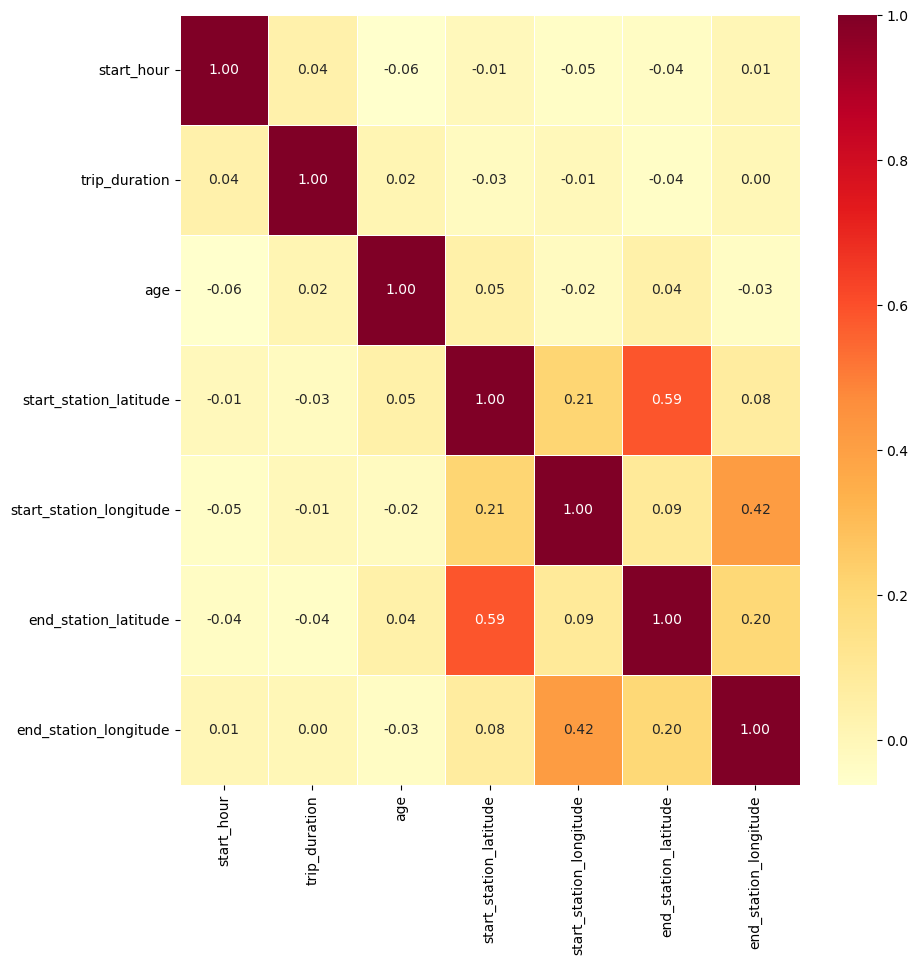

In [14]:
# Created a subplot with matplotlib
plt.figure(figsize=(10, 10))

# Created the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
bike_correlation = sns.heatmap(bike_sub.corr(), annot=True, fmt='.2f', cmap='YlOrRd', linewidths=0.5, linecolor='white')

plt.show()

### Scatterplots:

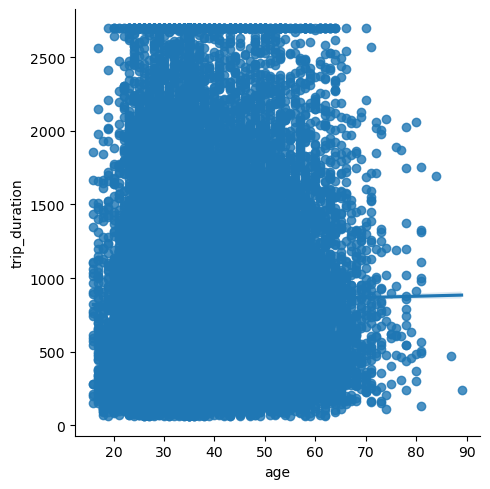

In [16]:
# Creating a scatterplot for the 'age' and 'trip_duration' columns in Seaborn

sns.lmplot(x = 'age', y = 'trip_duration', data = bike_sub)

### Pair Plots:

In [18]:
# Creating another subset for the PAIR PLOTS
bike_sub_2 = bike_cleaned

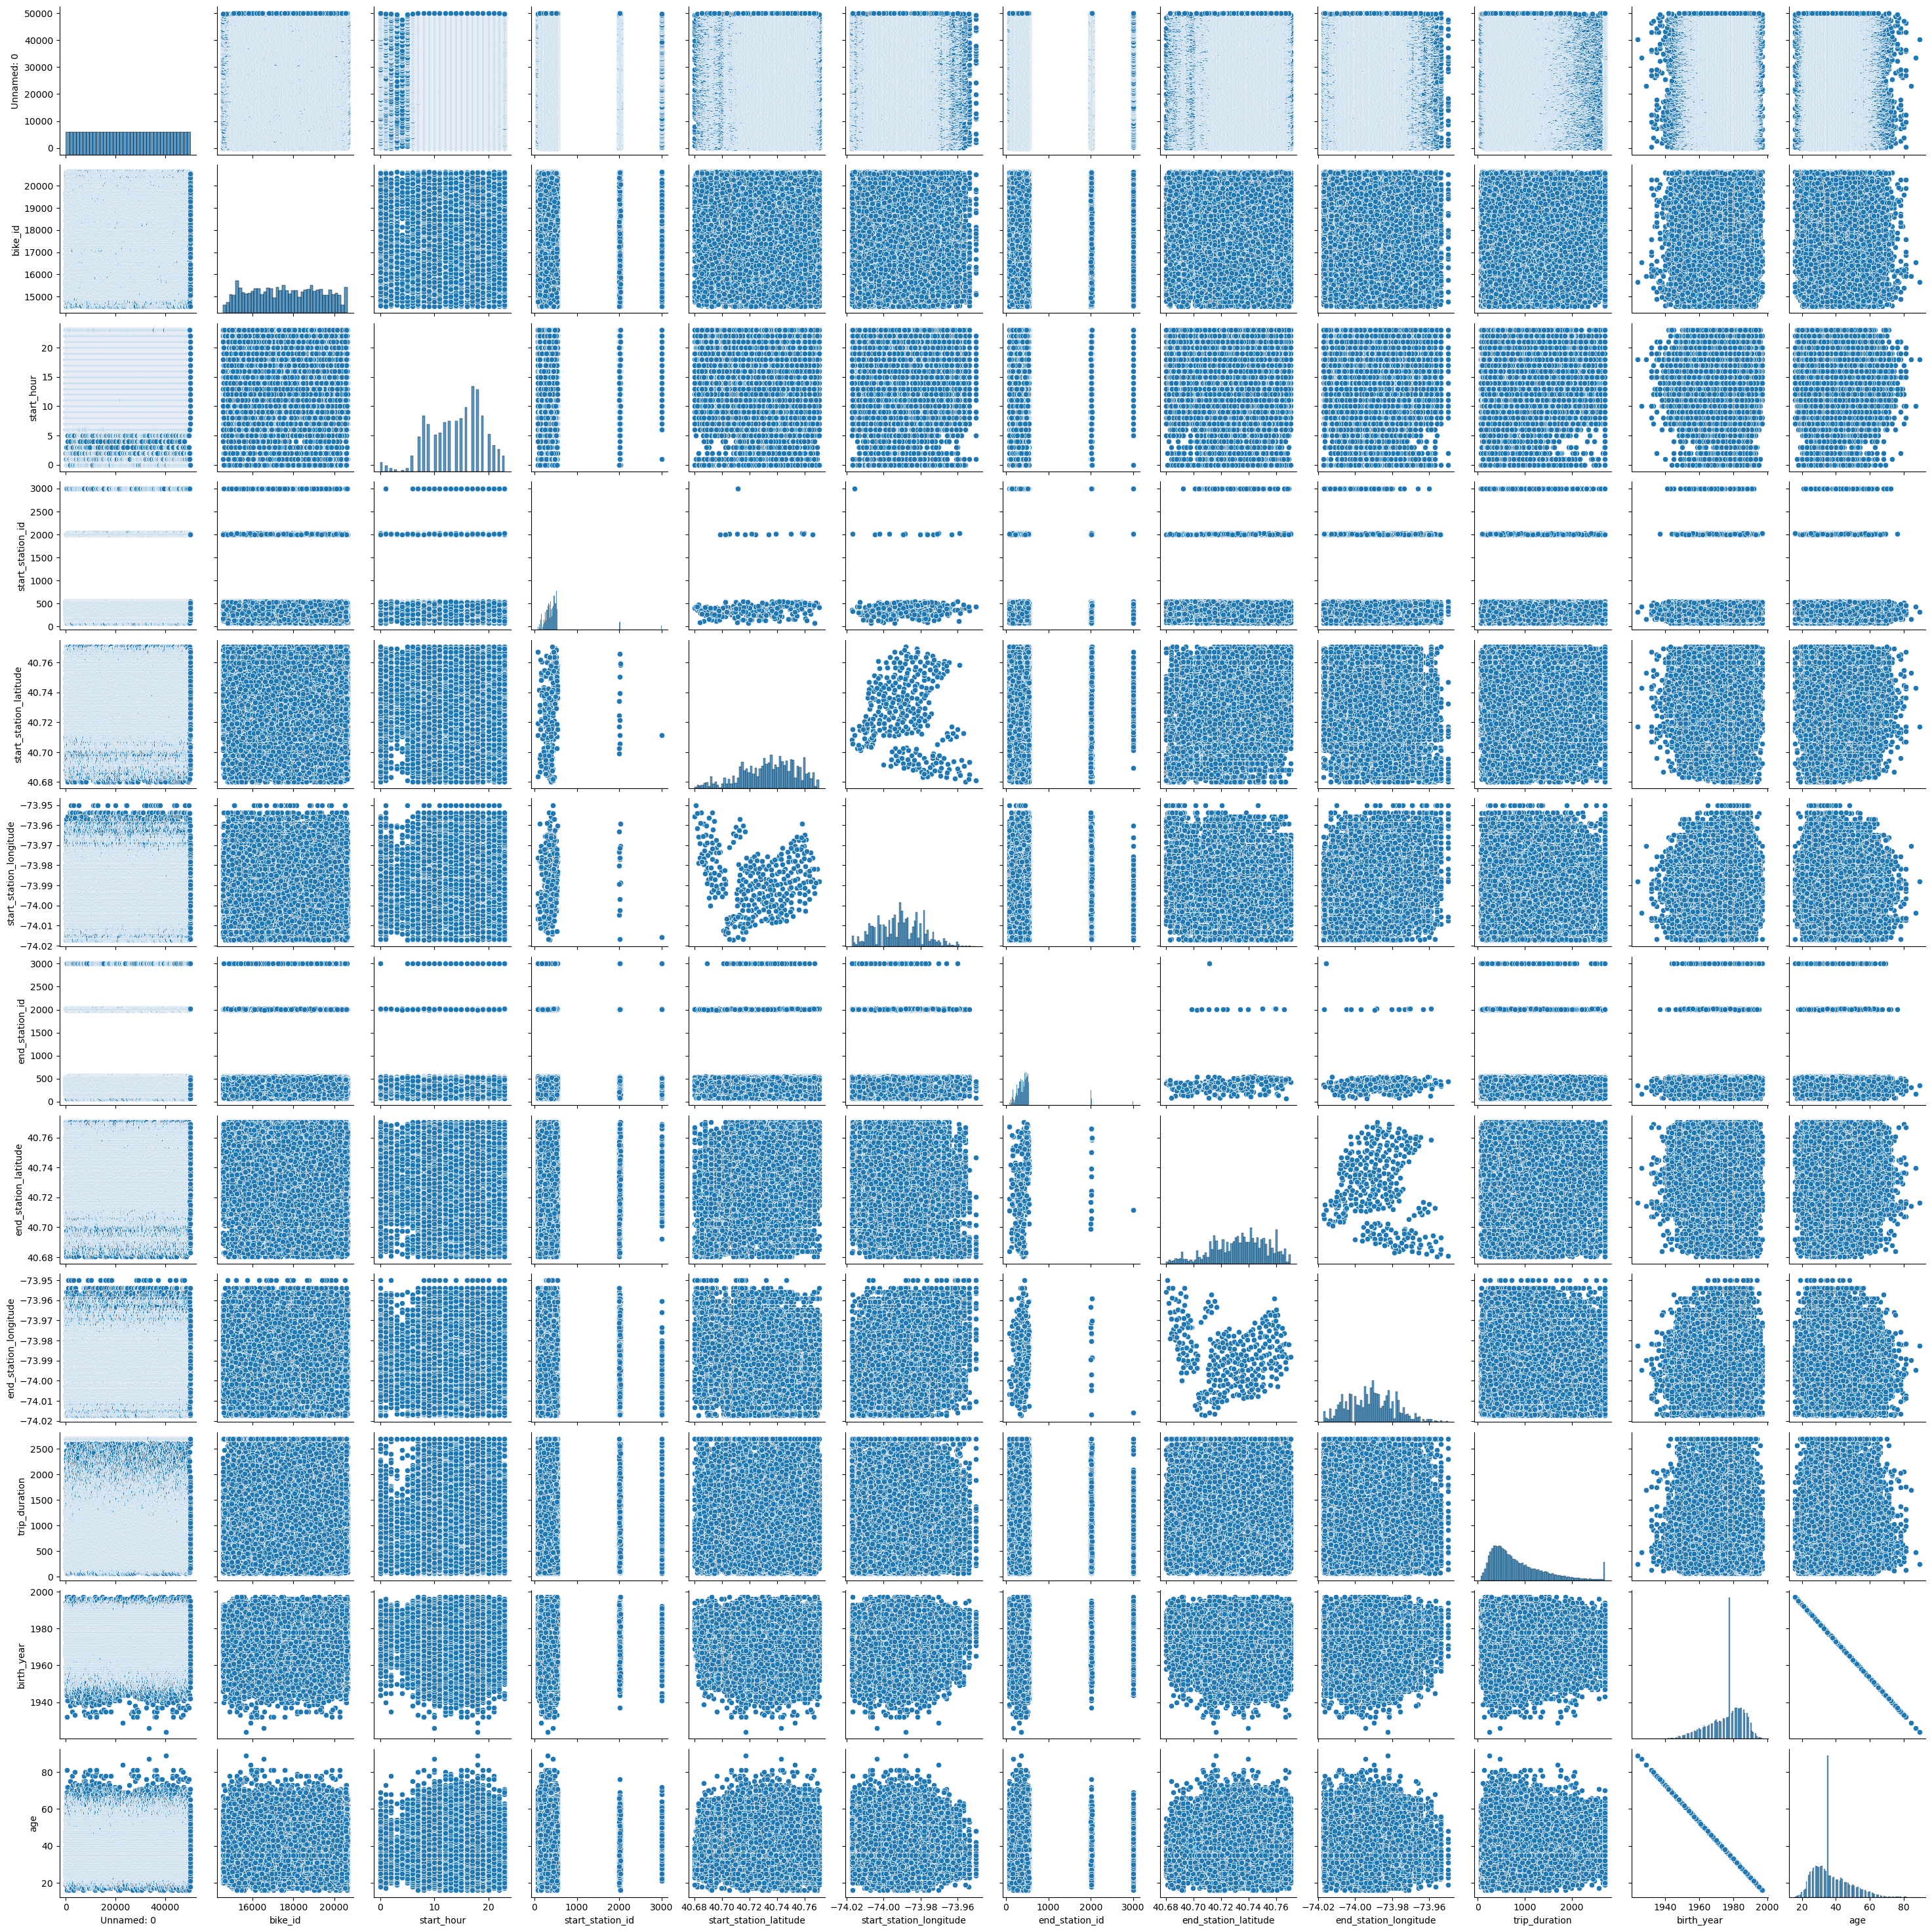

In [19]:
# Creating the PAIR PLOTS
bike_pair_plot = sns.pairplot(bike_sub_2)

### Categorical Plots:

#### Creating a categorical variable that splits the "start_hour" column into 3 different categories:

<Axes: xlabel='start_hour', ylabel='Count'>

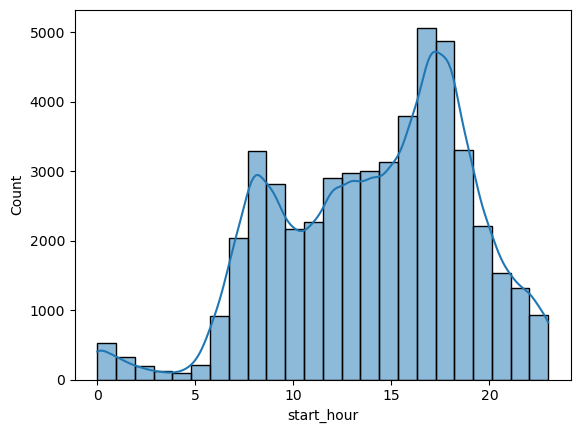

In [22]:
# Creating a HISTOGRAM to visualize the distribution of the 'start_hour' column

sns.histplot(bike_cleaned['start_hour'], bins = 24, kde = True)

In [23]:
bike_cleaned.loc[(bike_cleaned['start_hour'] >= 6) & (bike_cleaned['start_hour'] <= 12), 'time_of_day'] = 'Morning'

In [24]:
bike_cleaned.loc[(bike_cleaned['start_hour'] >= 12) & (bike_cleaned['start_hour'] <= 18), 'time_of_day'] = 'Afternoon'

In [25]:
bike_cleaned.loc[(bike_cleaned['start_hour'] >= 18) | (bike_cleaned['start_hour'] <= 6), 'time_of_day'] = 'Night'

In [26]:
# Counting the frequency of each variable in the 'time_of_day' column
bike_cleaned['time_of_day'].value_counts(dropna = False)

time_of_day
Afternoon    20861
Night        16542
Morning      12569
Name: count, dtype: int64

In [27]:
# Checking if the time_of_day column was created successfully
bike_cleaned.columns

Index(['Unnamed: 0', 'trip_id', 'bike_id', 'weekday', 'start_hour',
       'start_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_time',
       'end_station_id', 'end_station_name', 'end_station_latitude',
       'end_station_longitude', 'trip_duration', 'subscriber', 'birth_year',
       'gender', 'age', 'time_of_day'],
      dtype='object')

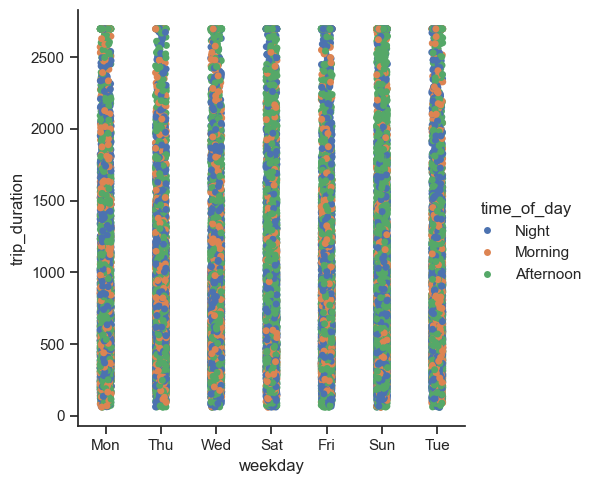

In [28]:
# Creating a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
bike_categorical_plot = sns.catplot(x='weekday', y='trip_duration', hue="time_of_day", data=bike_cleaned)